<a href="https://colab.research.google.com/github/melaalfa/DETEKSI-KESEGARAN-KUBIS-DENGAN-METODE-KNN-BERBASIS-FITUR-GLCM-DAN-HSV/blob/main/Bank_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of Bank Customer Churn: Identifying Key Drivers and Strategies for Retention

Overview:

The dataset comprises a range of customer-specific attributes, from credit scores to geographic location, gender, age, and even customer satisfaction scores. Each of these features could potentially play a role in determining whether a customer stays with the bank or decides to exit.

Customer churn, or the rate at which customers discontinue their services, is a key metric that directly impacts a bank's profitability. Understanding the factors that contribute to customer churn can provide valuable insights for developing effective retention strategies. the aim is to build a predictive model to identify key drivers of customer churn. The analysis seeks to uncover insights that can help in retaining customers and improving overall customer satisfaction.


In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

In [9]:
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
import plotly.express as px

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Understanding the Dataset

In [4]:
df = pd.read_csv("/content/Customer-Churn-Records.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0,0,5,GOLD,425


In [6]:
df.shape

(10000, 18)

In [7]:
# Display the column names
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0000,5000.5000,2886.8957,1.0000,2500.7500,5000.5000,7500.2500,10000.0000
CustomerId,10000.0000,15690940.5694,71936.1861,15565701.0000,15628528.2500,15690738.0000,15753233.7500,15815690.0000
CreditScore,10000.0000,650.5288,96.6533,350.0000,584.0000,652.0000,718.0000,850.0000
Age,10000.0000,38.9218,10.4878,18.0000,32.0000,37.0000,44.0000,92.0000
Tenure,10000.0000,5.0128,2.8922,0.0000,3.0000,5.0000,7.0000,10.0000
Balance,10000.0000,76485.8893,62397.4052,0.0000,0.0000,97198.5400,127644.2400,250898.0900
NumOfProducts,10000.0000,1.5302,0.5817,1.0000,1.0000,1.0000,2.0000,4.0000
HasCrCard,10000.0000,0.7055,0.4558,0.0000,0.0000,1.0000,1.0000,1.0000
IsActiveMember,10000.0000,0.5151,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
EstimatedSalary,10000.0000,100090.2399,57510.4928,11.5800,51002.1100,100193.9150,149388.2475,199992.4800


## Data Cleaning

In [11]:
# Removing the columns that are not useful for the dataset.
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0,0,5,GOLD,425


In [13]:
# Checking missing values
df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [14]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]

## Preprocessing

In [15]:
cat_col

Index(['Geography', 'Gender', 'Card Type'], dtype='object')

In [16]:
# one-hot encoding
dummies = pd.get_dummies(df[cat_col], drop_first = True)
dummies.shape

(10000, 6)

In [17]:
# results the original dataframe
df = pd.concat([df, dummies], axis = 1)

In [18]:
# the original cat variables as one-hot encoding are already created
df.drop(cat_col, axis = 1, inplace = True)
df.shape

(10000, 18)

In [19]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.0000,1,1,1,101348.8800,1,1,2,464,False,False,False,False,False,False
1,608,41,1,83807.8600,1,0,1,112542.5800,0,1,3,456,False,True,False,False,False,False
2,502,42,8,159660.8000,3,1,0,113931.5700,1,1,3,377,False,False,False,False,False,False
3,699,39,1,0.0000,2,0,0,93826.6300,0,0,5,350,False,False,False,True,False,False
4,850,43,2,125510.8200,1,1,1,79084.1000,0,0,5,425,False,True,False,True,False,False


##Rescaling the Features
Although simple linear regression may not be as sensitive to feature scaling as other models, rescaling remains a good practice to enhance interpretability, numerical stability, and convergence speed. Therefore, performing feature rescaling before building a linear regression model is a recommended step in data preprocessing. There are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)



In [20]:
from sklearn.preprocessing import StandardScaler

num_columns_list = num_col.tolist()
num_columns_list.remove("Exited")
num_col = pd.Index(num_columns_list)
numerical_columns = num_col

scaler = StandardScaler()
scaler.fit(df[numerical_columns])
df[numerical_columns] = scaler.transform(df[numerical_columns])

In [21]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,-0.3262,0.2935,-1.0418,-1.2258,-0.9116,0.6461,0.9702,0.0219,1,1.9729,-0.7211,-0.6308,False,False,False,False,False,False
1,-0.4400,0.1982,-1.3875,0.1174,-0.9116,-1.5478,0.9702,0.2165,0,1.9729,-0.0098,-0.6663,False,True,False,False,False,False
2,-1.5368,0.2935,1.0329,1.3331,2.5271,0.6461,-1.0307,0.2407,1,1.9729,-0.0098,-1.0159,False,False,False,False,False,False
3,0.5015,0.0075,-1.3875,-1.2258,0.8077,-1.5478,-1.0307,-0.1089,0,-0.5069,1.4128,-1.1355,False,False,False,True,False,False
4,2.0639,0.3889,-1.0418,0.7857,-0.9116,0.6461,0.9702,-0.3653,0,-0.5069,1.4128,-0.8035,False,True,False,True,False,False


In [22]:
df.dtypes

,0
CreditScore,float64
Age,float64
Tenure,float64
Balance,float64
NumOfProducts,float64
HasCrCard,float64
IsActiveMember,float64
EstimatedSalary,float64
Exited,int64
Complain,float64


In [23]:
df["Exited"].unique()

array([1, 0])

##Splitting the Data into Training and Testing Sets

In [25]:
# Features
X = df.drop('Exited', axis=1)
# Target variable
y = df['Exited']

In [26]:
y.dtypes

dtype('int64')

In [27]:
# Training and testing dataset with a ratio of 80:20.
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
9254,0.3670,-0.6600,0.3414,-1.2258,0.8077,0.6461,0.9702,1.3738,-0.5069,-0.7211,-0.4272,False,False,True,False,False,False
1561,-0.1917,0.2935,-0.3502,0.6914,0.8077,0.6461,0.9702,1.6674,-0.5069,0.7015,1.5603,True,False,True,False,True,False
1670,-0.9470,-1.4228,-0.6960,0.6131,-0.9116,0.6461,-1.0307,-0.2469,1.9729,0.7015,-1.2373,False,True,True,False,False,True
6087,-0.9263,-1.1368,1.3787,0.9480,-0.9116,0.6461,-1.0307,0.9214,1.9729,-0.7211,-0.1749,False,False,False,False,False,True
6669,-1.3816,1.6285,1.3787,1.0524,-0.9116,-1.5478,-1.0307,-1.0538,1.9729,-0.0098,0.5333,False,False,True,False,True,False


In [29]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,8000.0000,0.0116,0.9971,-3.1095,-0.6780,0.0256,0.7085,2.0639
Age,8000.0000,-0.0023,1.0030,-1.9950,-0.6600,-0.1833,0.4842,5.0612
Tenure,8000.0000,-0.0031,0.9965,-1.7333,-0.6960,-0.0044,0.6871,1.7245
Balance,8000.0000,-0.0062,1.0011,-1.2258,-1.2258,0.3199,0.8194,2.7953
NumOfProducts,8000.0000,0.0020,0.9967,-0.9116,-0.9116,-0.9116,0.8077,4.2464
HasCrCard,8000.0000,-0.0044,1.0020,-1.5478,-1.5478,0.6461,0.6461,0.6461
IsActiveMember,8000.0000,-0.0047,1.0002,-1.0307,-1.0307,0.9702,0.9702,0.9702
EstimatedSalary,8000.0000,0.0059,1.0002,-1.7389,-0.8473,0.0069,0.8609,1.7368
Complain,8000.0000,0.0049,1.0036,-0.5069,-0.5069,-0.5069,-0.5069,1.9729
Satisfaction Score,8000.0000,-0.0020,0.9989,-1.4324,-0.7211,-0.0098,0.7015,1.4128


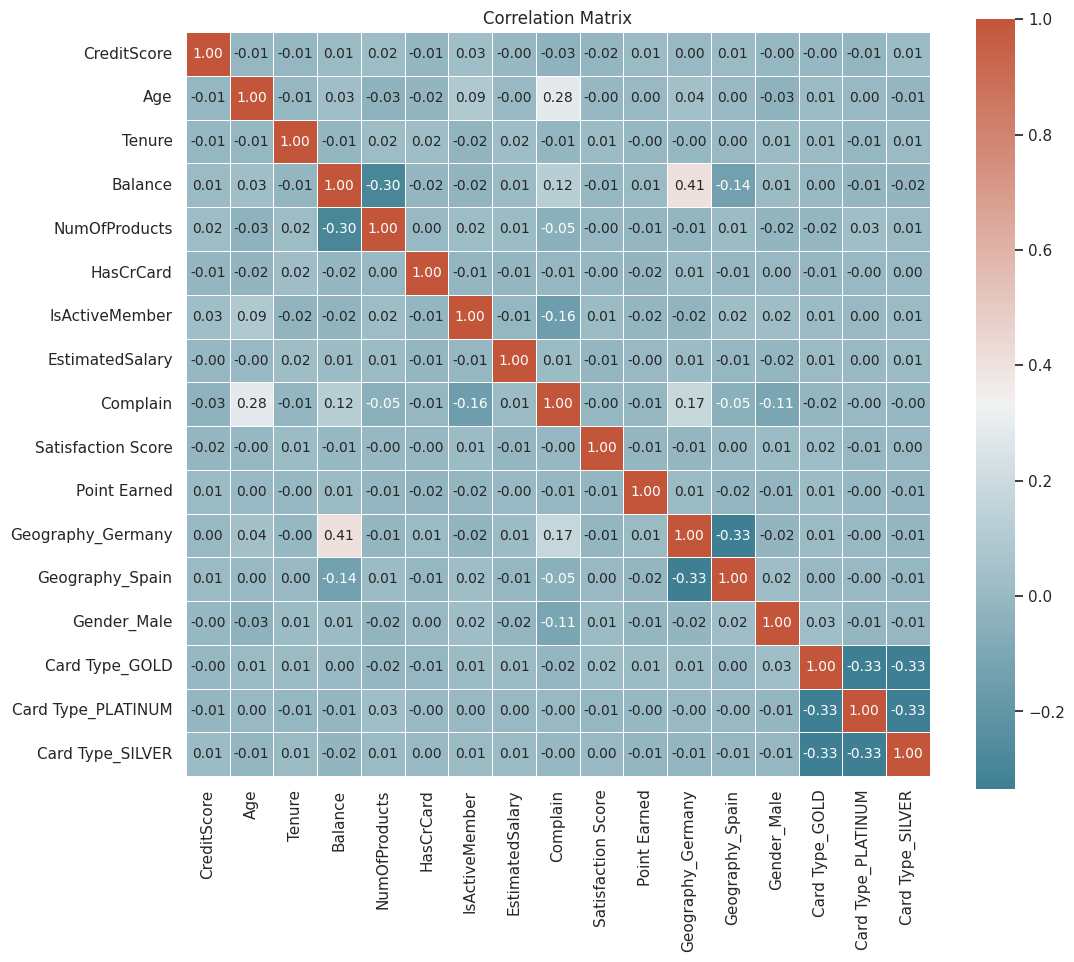

In [30]:
# Check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(12, 10))
corr = X_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", annot_kws={"size": 10}, square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Based on the data above, it can be concluded that:


*   Credit Score: Positively correlated with multiple variables. Higher credit scores correlate with higher account balances, more credit cards, higher estimated salaries, active membership, and lower churn and complaints.
*   Age: Positively correlated with tenure, balance, and number of products. Older customers typically have longer account tenures, higher balances, and more credit cards.
*   Tenure: Positively correlated with balance and number of products. Longer account tenures are associated with higher balances and more credit cards.
Balance: Positively correlated with the number of products. Higher balances link to having more credit cards.
*  Number of Products: Positively correlated with having a credit card. More products are associated with a higher likelihood of having multiple credit cards.
*   Exited (Churned): Negatively correlated with most variables. Churned customers tend to have lower credit scores, balances, credit cards, estimated salaries, active memberships, and higher complaints.
*   Complained: The majority of variables show a negative correlation. Customers who complained tend to exhibit similar traits to churned customers, including lower credit scores, balances, credit cards, estimated salaries, and active memberships.


In conclusion, the correlation matrix indicates that credit score is a strong indicator of a customer's financial health and their relationship with the bank. Customers with higher credit scores tend to have more positive relationships with the bank, while customers with lower credit scores tend to have more negative relationships with the bank.






## Modelling
Data modeling using the Random Forest and Decision Tree algorithms.

Random Forest is a machine learning model used for classification and regression tasks. This algorithm is an ensemble learning method, which means it combines several simpler predictive models to achieve more accurate and stable predictions. It's known for its robustness against overfitting, handles high-dimensional data well, and generally provides high predictive accuracy.

In [31]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

# Fitting the model on the training data
model_rf.fit(X_train, y_train)

# Predicting on the test data
y_pred = model_rf.predict(X_test)

# Calculating the accuracy
random_forest_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Random Forest model:", random_forest_accuracy)

Accuracy of the Random Forest model: 0.999


In [32]:
# Generating the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



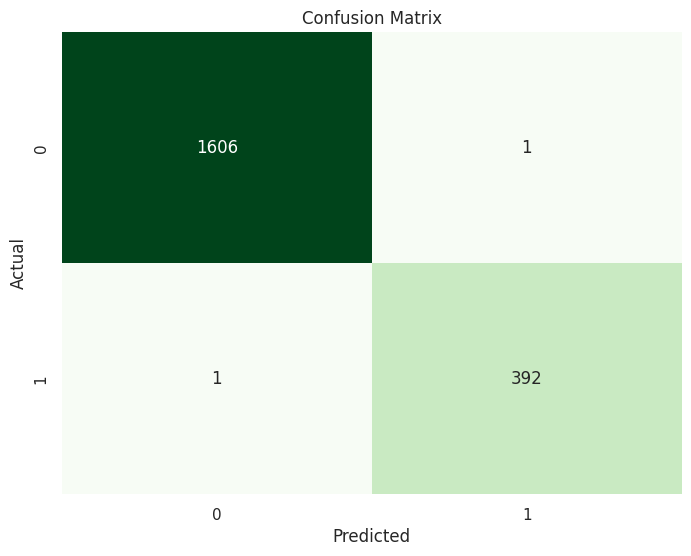

In [33]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Decision Trees are a non-parametric supervised learning method used for classification and regression. It partitions the feature space into segments based on the features' values, forming a tree-like structure to make predictions. Each node in the tree represents a feature and a decision point, optimizing to minimize impurity or maximize information gain at each step.

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Predicting on the test data
y_pred = model.predict(X_test)

# Calculating the accuracy
decision_tree_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Decision Tree model:", decision_tree_accuracy)

Accuracy of the Decision Tree model: 0.9975


In [35]:
# Generating the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      0.99      0.99       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



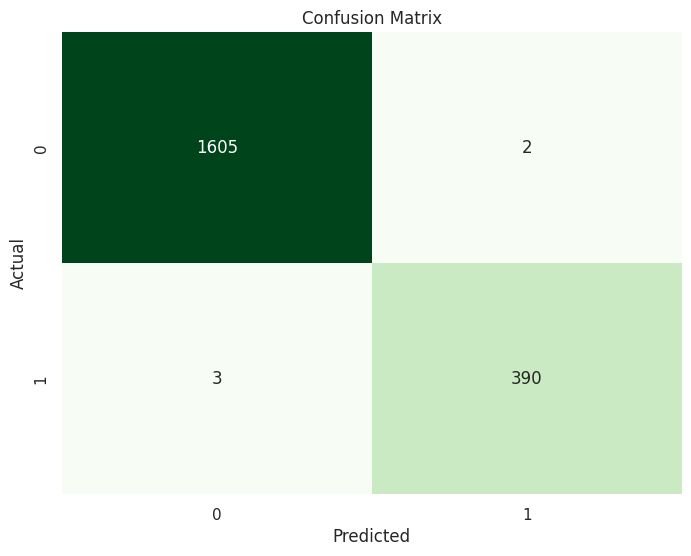

In [36]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [37]:
# For model train data
model_accuracies_train = {
    'Random Forest': random_forest_accuracy,
    'Decision Tree': decision_tree_accuracy,
}

accuracy_df = pd.DataFrame(list(model_accuracies_train.items()), columns=['Model Name', 'Accuracy'])

accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

accuracy_df

,Model Name,Accuracy
0,Random Forest,0.9990
1,Decision Tree,0.9975


## Data Visualization

In [38]:
# Percentage of customer churn or stayed in the bank
total_customers = len(df)
churned_count = df[df['Exited'] == 1]['Exited'].count()
not_churned_count = df[df['Exited'] == 0]['Exited'].count()
percentage_churned = (churned_count / total_customers) * 100
percentage_not_churned = (not_churned_count / total_customers) * 100

print(f"Percentage of customers who churned: {percentage_churned:.2f}%")
print(f"Percentage of customers who did not churn: {percentage_not_churned:.2f}%")

Percentage of customers who churned: 20.38%
Percentage of customers who did not churn: 79.62%


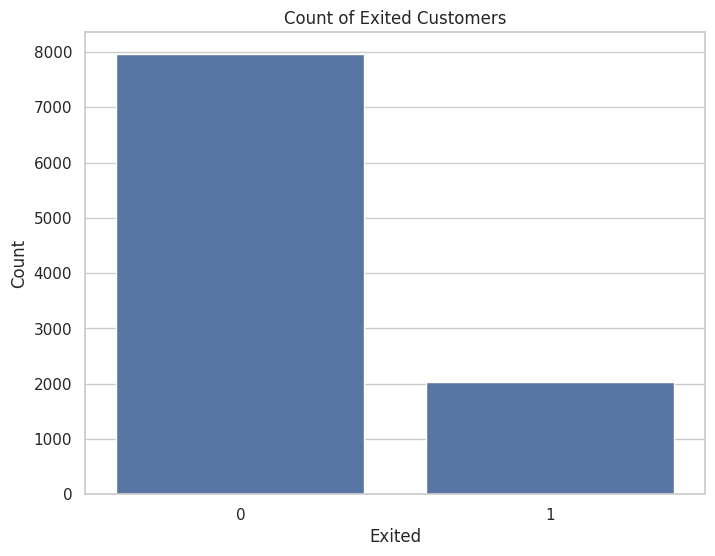

In [ ]:
sns.set(style="whitegrid")

# Plotting a bar plot for the 'Exited' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Exited')
plt.title('Count of Exited Customers')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

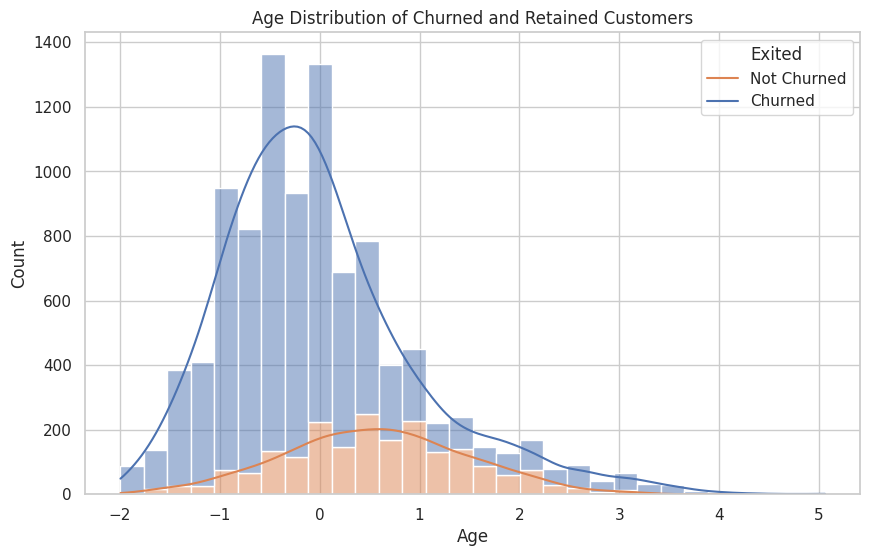

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Exited', multiple='stack', bins=30, kde=True)
plt.title('Age Distribution of Churned and Retained Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

**The age distribution of churned individuals appears right-skewed, indicating that the probability of older individuals are less likely to churn.

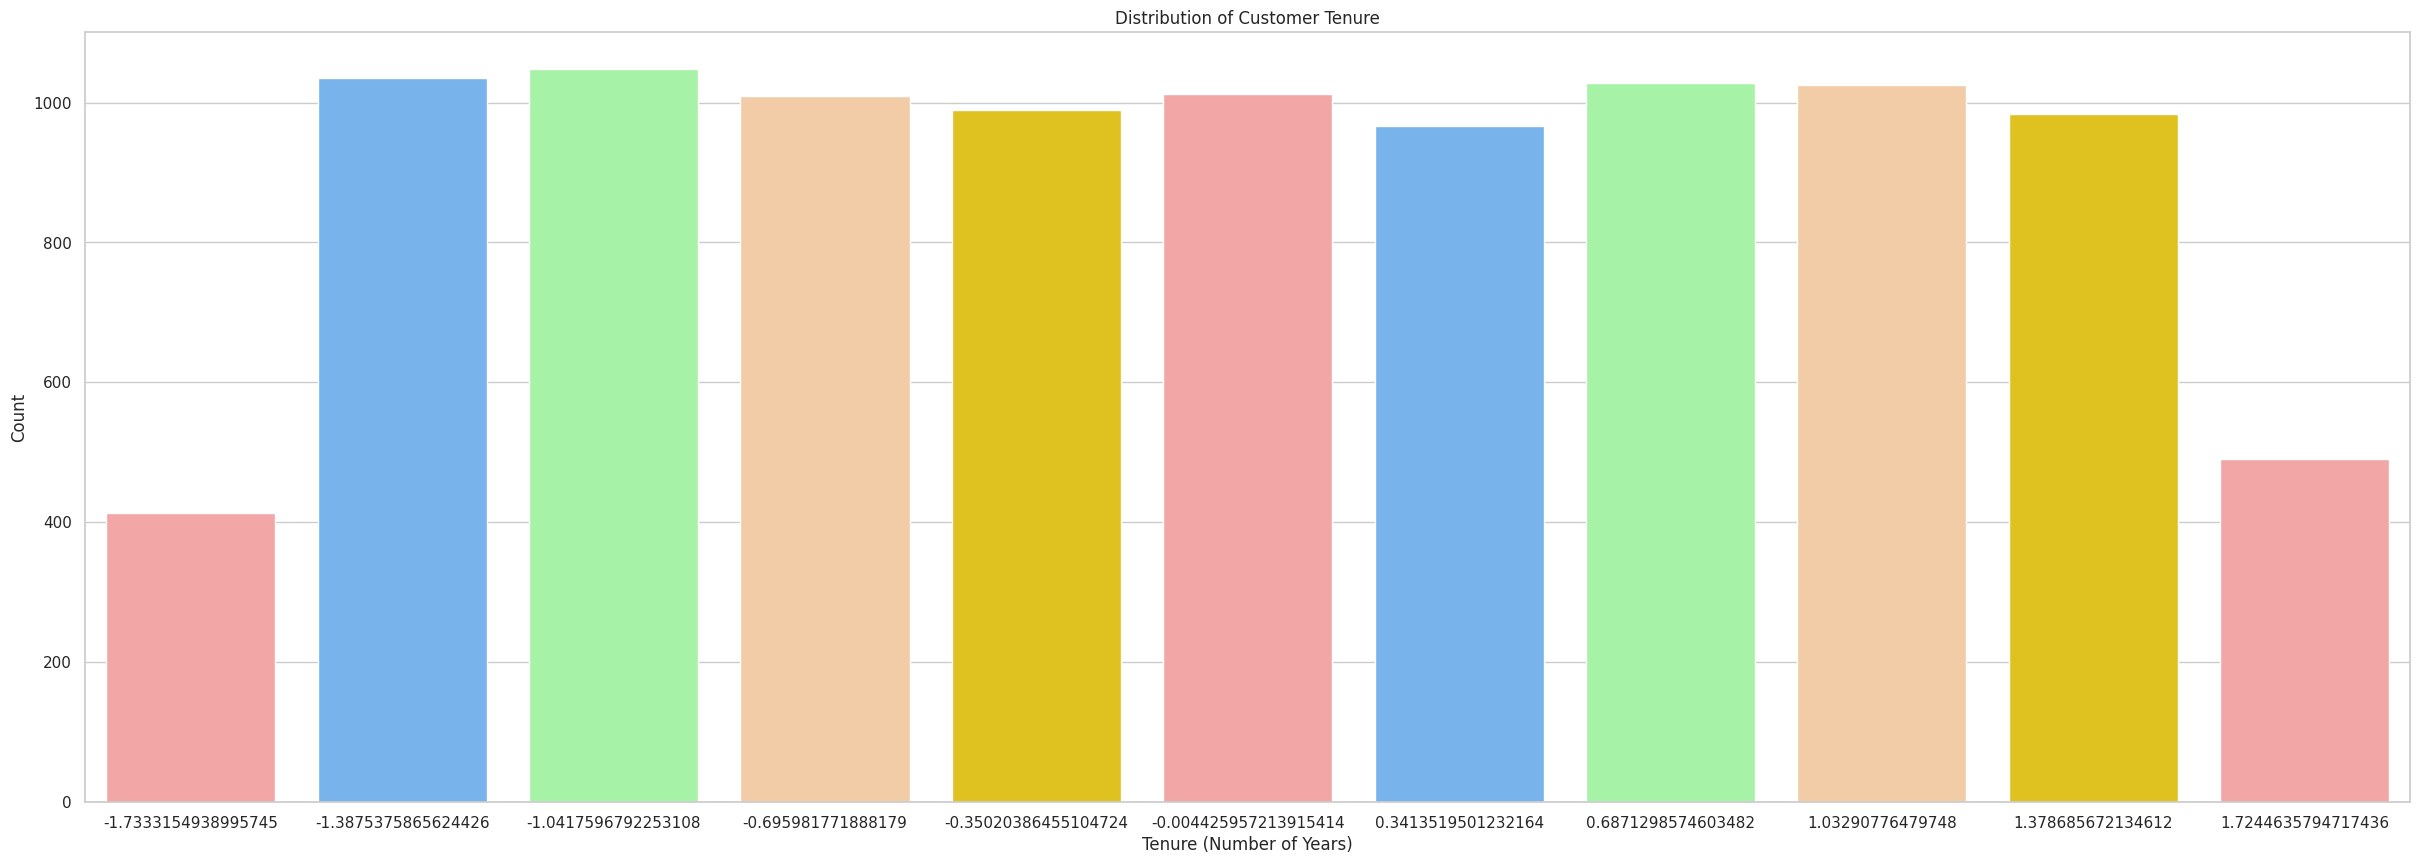

In [ ]:
plt.figure(figsize=(30, 10))
sns.countplot(data=df, x='Tenure', palette=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700'])  # Daftar warna kustom
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Number of Years)')
plt.ylabel('Count')
plt.show()


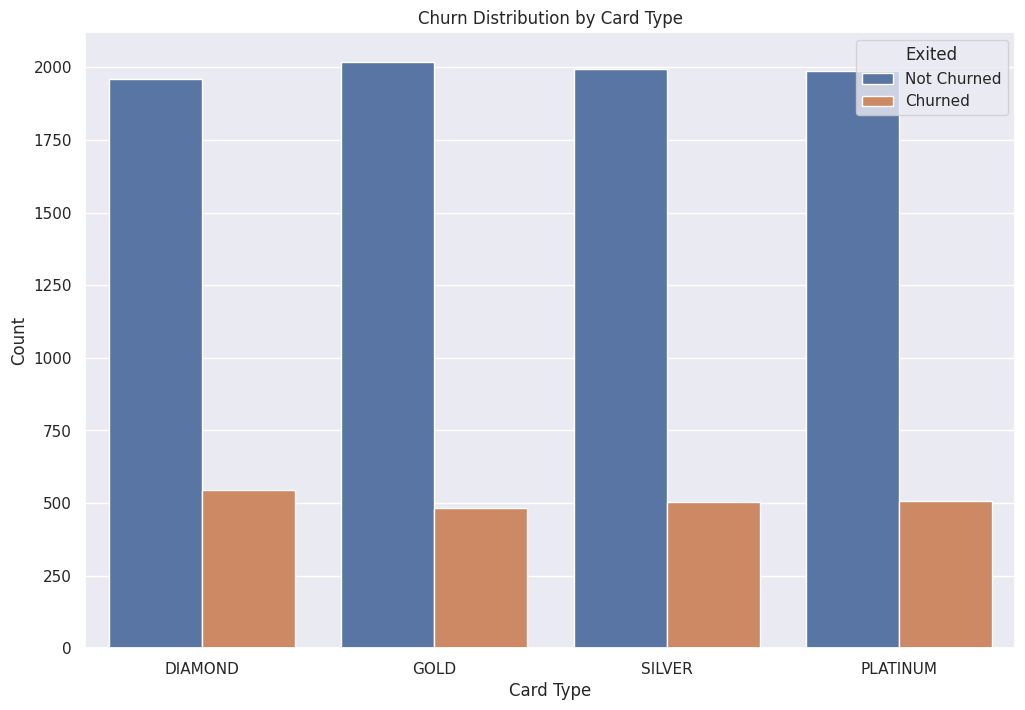

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Card Type', hue='Exited', order=['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'])
plt.title('Churn Distribution by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()


**It seems that Card Type has no notable impact on customer churn or retention.

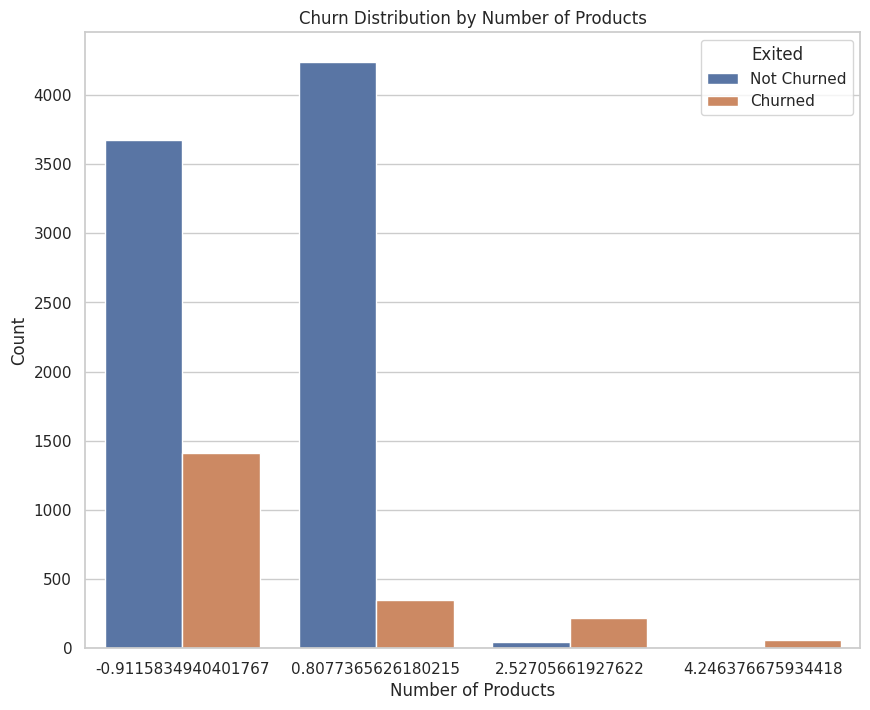

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='NumOfProducts', hue='Exited')
plt.title('Churn Distribution by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

In [ ]:
# Calculate churn percentages by number of products
churn_percentage_by_product_count = df.groupby('NumOfProducts')['Exited'].mean() * 100

# Display churn percentage by number of products
print("Churn Percentage by Number of Products:")
print(churn_percentage_by_product_count)

Churn Percentage by Number of Products:
NumOfProducts
-0.9116    27.7144
0.8077      7.6035
2.5271     82.7068
4.2464    100.0000
Name: Exited, dtype: float64


**Customers with a higher number of products (3 or 4) exhibit a higher probability of churn. Conversely, customers with only two products have a lower chance of leaving the bank compared to those with just one product.

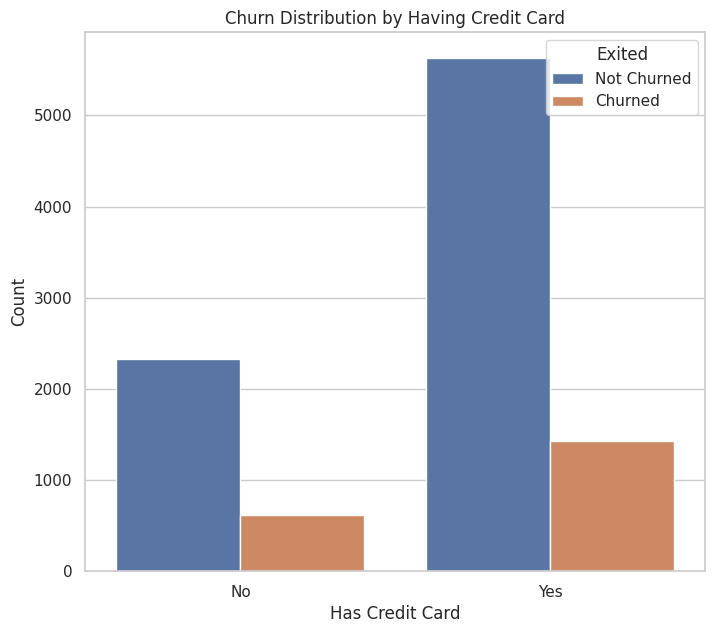

In [ ]:
plt.figure(figsize=(8, 7))
sns.countplot(data=df, x='HasCrCard', hue='Exited')
plt.title('Churn Distribution by Having Credit Card')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Set x-axis labels as 'No' and 'Yes'
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

In [ ]:
# Calculate churn percentages by HasCrCard
churn_percentage_by_card = df.groupby('HasCrCard')['Exited'].mean() * 100

# Display churn percentage by HasCrCard
print("Churn Percentage by Having Credit Card:")
print(churn_percentage_by_card)

Churn Percentage by Having Credit Card:
HasCrCard
-1.5478   20.8149
0.6461    20.1984
Name: Exited, dtype: float64


**The presence or absence of a credit card does not significantly affect whether a person churns or remains with the bank.

In [ ]:
df['Satisfaction Score'].unique()

array([-0.72113042, -0.00981614,  1.41281242,  0.70149814, -1.4324447 ])

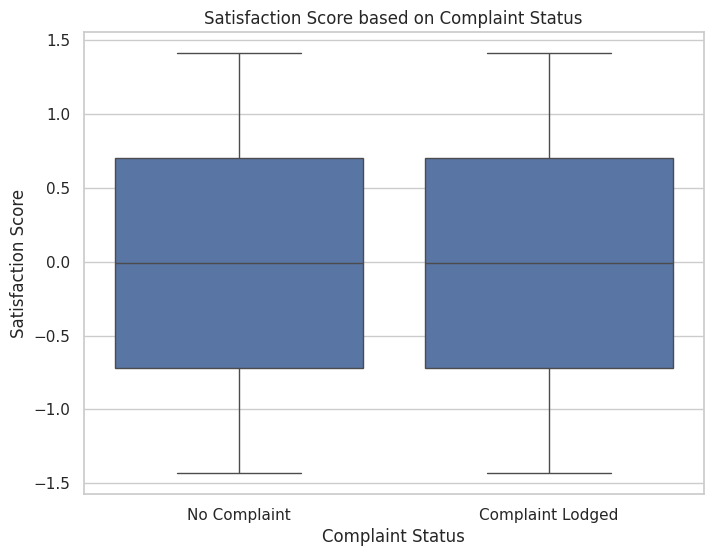

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Complain', y='Satisfaction Score')
plt.title('Satisfaction Score based on Complaint Status')
plt.xlabel('Complaint Status')
plt.ylabel('Satisfaction Score')
plt.xticks(ticks=[0, 1], labels=['No Complaint', 'Complaint Lodged'])  # Set x-axis labels
plt.show()

**The satisfaction scores for customers who lodged a complaint and those who did not are similar, indicating a consistent level of satisfaction with the resolution of issues regardless of complaint status.

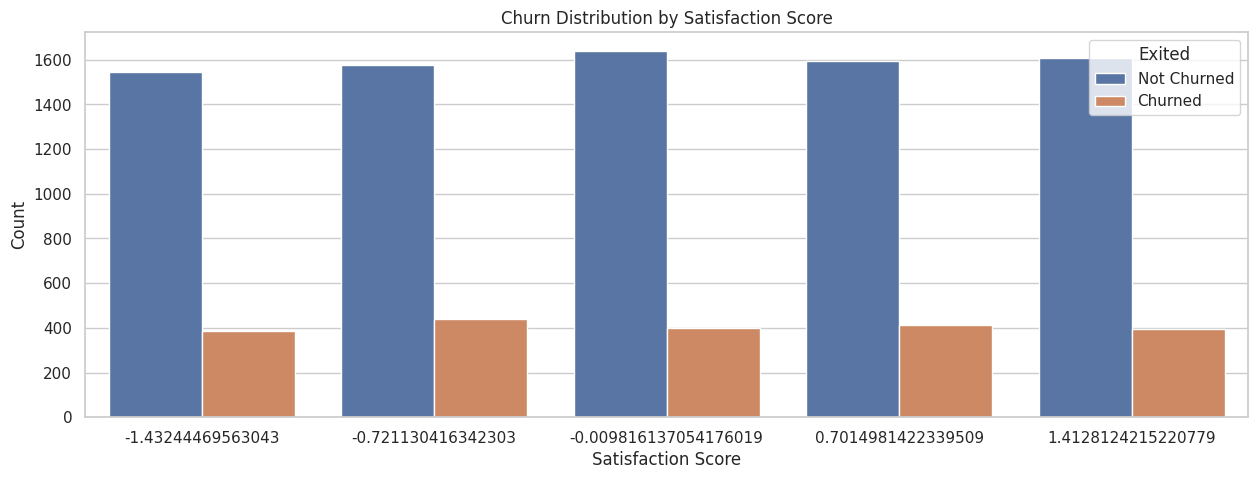

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='Satisfaction Score', hue='Exited')
plt.title('Churn Distribution by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

**There appears to be no significant correlation between satisfaction scores and customer churn. Higher satisfaction scores do not seem to have a discernible impact on reducing churn rates.

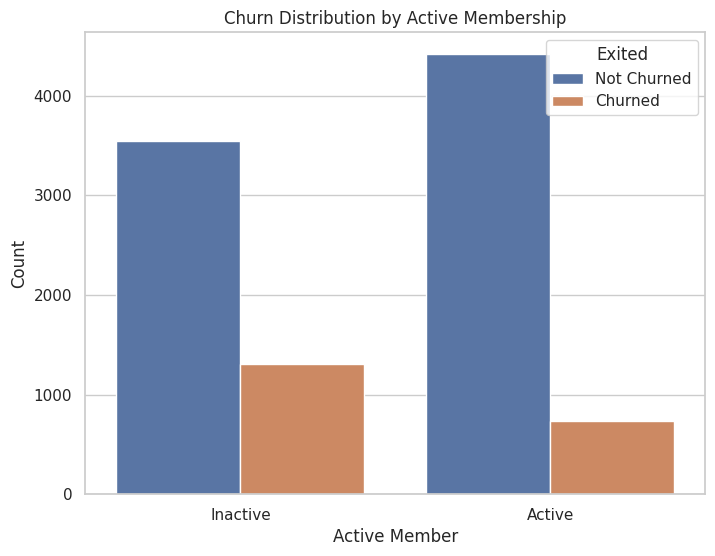

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='IsActiveMember', hue='Exited')
plt.title('Churn Distribution by Active Membership')
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'])  # Set x-axis labels
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

**Active members tend to have a higher likelihood of staying (not churning) compared to inactive members.

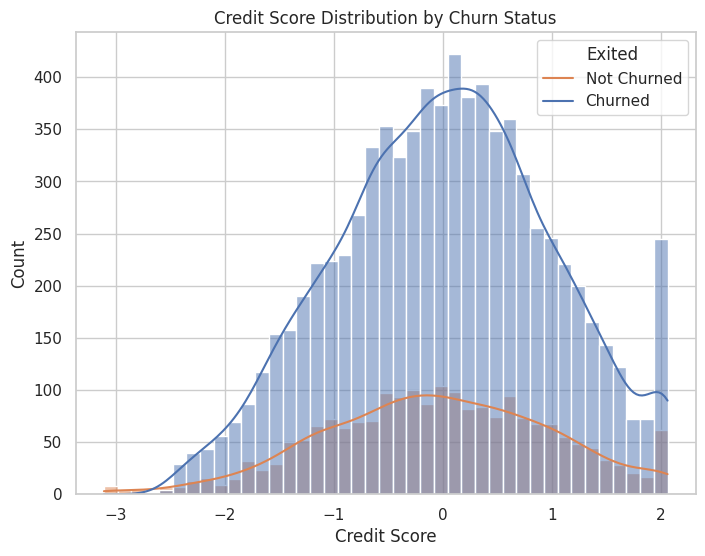

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='CreditScore', hue='Exited', kde=True)
plt.title('Credit Score Distribution by Churn Status')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()



*   Customers with lower credit scores (400-500 range) show a higher tendency to churn, indicating a likelihood for churn among this group.
*   Conversely, customers with higher credit scores (700-800 range) exhibit a greater tendency to stay with the service, suggesting higher retention rates among this cohort.



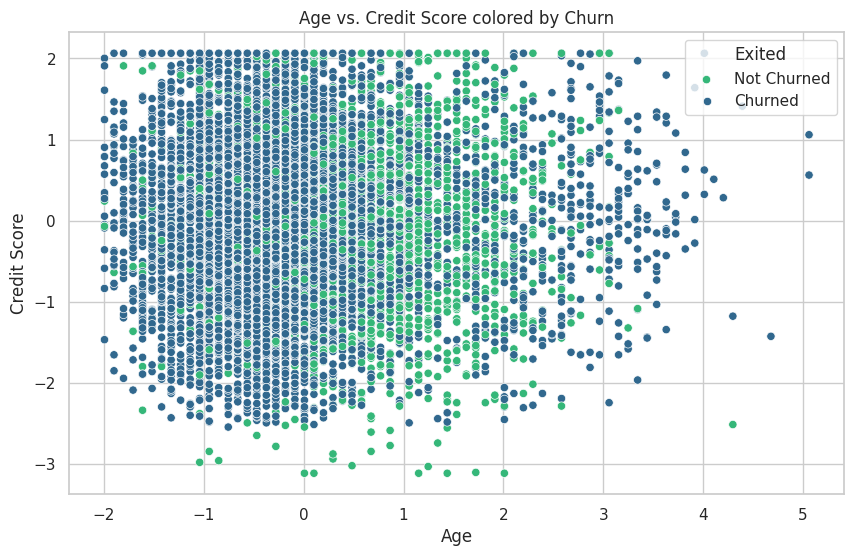

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='CreditScore', hue='Exited', palette='viridis')
plt.title('Age vs. Credit Score colored by Churn')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()



*   Age positively correlates with credit score, indicating older customers tend to have higher credit scores, likely due to their longer credit history and financial decisions over time.
*   Higher credit scores are associated with lower churn rates, indicating greater financial stability among customers
*   A cluster of churned customers is observed in the lower-left corner,  likely representing younger individuals with lower credit scores, who may be experiencing financial constraints and therefore have a higher likelihood of churning.






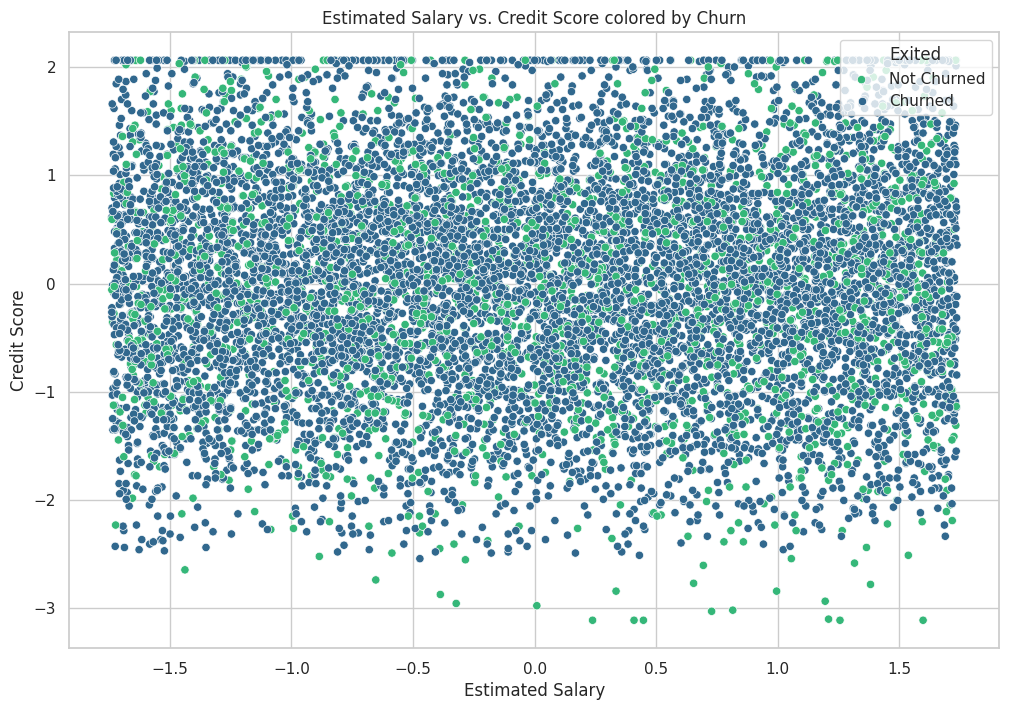

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='EstimatedSalary', y='CreditScore', hue='Exited', palette='viridis')
plt.title('Estimated Salary vs. Credit Score colored by Churn')
plt.xlabel('Estimated Salary')
plt.ylabel('Credit Score')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()



*   There is a weak positive correlation between estimated salary and credit score : Higher estimated salaries slightly correlate with higher credit scores,  though there are exceptions where individuals with high salaries still have low credit scores.
*   Higher credit scores associate with lower churn likelihood: Customers with better credit profiles tend to exhibit more financial stability, reducing the probability of service cancellations due to financial constraints.
*   No clear pattern in churn behavior: Churned customers exhibit no identifiable trend regarding estimated salary or credit score, indicating no direct relationship between these factors and churn propensity.





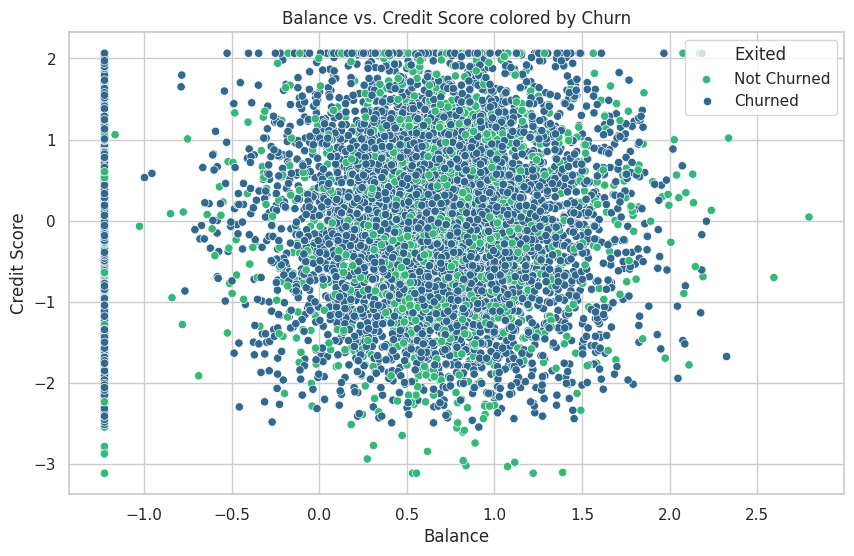

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Balance', y='CreditScore', hue='Exited', palette='viridis')
plt.title('Balance vs. Credit Score colored by Churn')
plt.xlabel('Balance')
plt.ylabel('Credit Score')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()



*   Negative correlation: Higher account balances tend to correspond with lower credit scores, possibly indicating higher debt impacting credit scores.
*   Credit score's impact on churn: Customers with better credit profiles tend to have lower churn rates, reflecting greater financial stability.
*   Churned customer cluster: The lower-right cluster represents customers with high balances and low credit scores, who may be experiencing financial strain, leading to a higher likelihood of churn.






##Recommendation :


*   Conduct regular customer satisfaction surveys to identify pain points and areas for improvement. Addressing customer concerns promptly and effectively can help reduce churn rates.
*   Create loyalty programs, personalized offers, and rewards to incentivize customers to stay with the bank. Building strong relationships and providing value-added services can increase customer loyalty.

*   Ensure effective communication channels are in place to keep customers informed about new products, services, and updates. Regularly engage with customers through personalized interactions and provide timely support.
*   Use insights from high-income customer segments to design marketing campaigns and offerings specifically for them. This can strengthen relationships, foster loyalty, and reduce the likelihood of churn.

*   Stay attuned to the market to identify emerging trends and offer innovative products and services that differentiate the bank from competitors. Regularly review and update existing offerings to remain competitive.
*   trust and transparency through clear communication, fair pricing, and reliable services. Ensure customers feel valued and have confidence in the bank's integrity and commitment to their financial well-being.

*   Improve the complaint resolution process by actively addressing customer complaints, providing prompt and satisfactory solutions, and enhancing customer support channels. This can help reduce churn rates associated with unresolved complaints.
*   Provide financial literacy programs and educational resources to help customers make well-informed decisions. Educated customers are more likely to stay loyal and satisfied with the bank's services.

*   Continuous monitoring and adaptation of strategies based on ongoing data analysis.
*   implementing these recommendations, the bank can strengthen customer relationships, increase customer satisfaction, and ultimately reduce churn rates. Regular monitoring and analysis of customer behavior and feedback will help refine strategies and further improve customer retention efforts.













##Conclusion :

From the explatory data analysis, it can be concluded that several factors play a significant role in determining customer churn, or the decision to leave the bank. Key factors include age, credit score, number of products owned, and customer activity status. Older customers with higher credit scores tend to be more loyal, while younger customers with lower credit scores are more likely to leave the bank. Additionally, although customer satisfaction and complaints do not show a clear relationship with churn rates, effective communication and improving customer satisfaction remain crucial factors in retaining customers.

Given the financial implications of customer churn, it's crucial to refine the model to accurately identify customers at risk of leaving. This can be achieved through a combination of advanced techniques such as feature engineering, model selection, and addressing data imbalance.
Furthermore, maintaining a feedback loop with domain experts and continuously monitoring the model's performance will be integral in ensuring its effectiveness over time. By iterating on these strategies and incorporating domain knowledge, we can work towards a more robust and accurate customer churn prediction model that provides actionable insights for retention efforts.
